### NIM - NAME:
### 2440062155 - Edwin Ario Abdiwijaya
### 2440028350 - Nathaniel Orion
### 2440019346 - Peter Samuel Lim

### Class: LA01

### Machine Learning Project

### Dataset: https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Dataset and process the dataset

In [2]:
# Read the dataset
data = pd.read_csv("ford.csv")

# Show the dataset
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


Attribute Information:

1.model -> Ford Car Brands

2.year -> Production Year

3.price -> Price of car in $

4.transmission -> Automatic, Manual, Semi-Auto

5.mileage -> Number of miles traveled

6.fuel_Type -> Petrol, Diesel, Hybrid, Electric, Other

7.tax -> Annual Tax

8.mpg -> Miles per Gallon

9.engineSize -> Car's Engine Size


In [3]:
# Check if there's any null in the data
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
# For the later purpose, we append 1 data into the dataset. The data that we append is the first data in the dataset
tData = {'model': 'Fiesta', 'year': 2017, 'price': 12000, 'transmission': 'Automatic', 'mileage': 15944, 'fuelType': 'Petrol',
             'tax': 150, 'mpg': 57.7, 'engineSize': 1.0}
data = data.append(tData, ignore_index=True)

# Show the dataset again
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


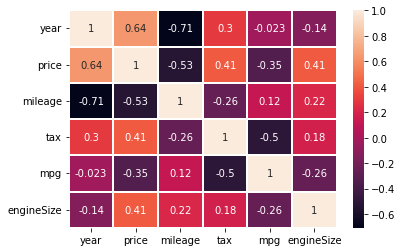

In [5]:
# Show the correlation data with the heatmap
sns.heatmap(data.corr(), annot=True, linecolor='white', linewidths=2)
plt.show()

In [6]:
# To be more precise, print the value correlation
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707816,0.298505,-0.022967,-0.137312
price,0.636009,1.000000,-0.530656,0.406851,-0.346419,0.411173
mileage,-0.707816,-0.530656,1.000000,-0.260460,0.120075,0.215047
tax,0.298505,0.406851,-0.260460,1.000000,-0.502976,0.184332
mpg,-0.022967,-0.346419,0.120075,-0.502976,1.000000,-0.260516
engineSize,-0.137312,0.411173,0.215047,0.184332,-0.260516,1.000000


In [7]:
# Check the data types
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [8]:
# Change the object type into category type
data['model'] = data['model'].astype('category')
data['transmission'] = data['transmission'].astype('category')
data['fuelType'] = data['fuelType'].astype('category')

data['model'] = data['model'].cat.codes
data['transmission'] = data['transmission'].cat.codes
data['fuelType'] = data['fuelType'].cat.codes

# Then show the data head
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0


### Scale the data

In [9]:
# Create a variable to contain the scaler
scaler = MinMaxScaler()

# Scale the data
data_scaled = scaler.fit_transform(data.to_numpy())
data_scaled = pd.DataFrame(data_scaled, columns=['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
                                                'mpg', 'engineSize'])

# Print the scaled data
print(data_scaled)

          model      year     price  transmission   mileage  fuelType  \
0      0.208333  0.328125  0.211101           0.0  0.089747       1.0   
1      0.250000  0.343750  0.247798           0.5  0.051125       1.0   
2      0.250000  0.328125  0.229450           0.5  0.070113       1.0   
3      0.208333  0.359375  0.312018           0.5  0.058877       1.0   
4      0.208333  0.359375  0.293670           0.0  0.008337       1.0   
...         ...       ...       ...           ...       ...       ...   
17962  0.000000  0.281250  0.128514           0.5  0.229106       1.0   
17963  0.250000  0.296875  0.174385           0.5  0.039456       0.0   
17964  0.458333  0.343750  0.143193           0.5  0.028180       1.0   
17965  1.000000  0.296875  0.143193           0.5  0.028180       1.0   
17966  0.958333  0.328125  0.211101           0.0  0.089747       1.0   

            tax       mpg  engineSize  
0      0.258621  0.203867        0.20  
1      0.258621  0.203867        0.20  
2  

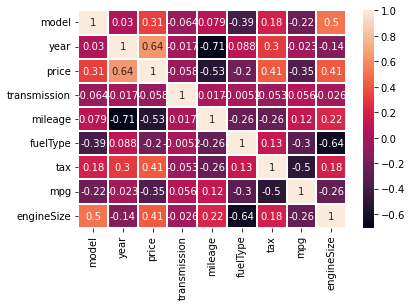

In [10]:
# Show the correlation data with the heatmap again
sns.heatmap(data_scaled.corr(), annot=True, linecolor='white', linewidths=2)
plt.show()

In [11]:
# To be more precise, print the value correlation
data_scaled.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.030228,0.314551,-0.063947,0.078626,-0.388338,0.183507,-0.221851,0.499909
year,0.030228,1.000000,0.636009,-0.017127,-0.707816,0.087955,0.298505,-0.022967,-0.137312
price,0.314551,0.636009,1.000000,-0.058013,-0.530656,-0.202855,0.406851,-0.346419,0.411173
transmission,-0.063947,-0.017127,-0.058013,1.000000,0.016702,-0.005218,-0.053382,0.056076,-0.026360
mileage,0.078626,-0.707816,-0.530656,0.016702,1.000000,-0.257567,-0.260460,0.120075,0.215047
fuelType,-0.388338,0.087955,-0.202855,-0.005218,-0.257567,1.000000,0.129605,-0.297793,-0.644630
tax,0.183507,0.298505,0.406851,-0.053382,-0.260460,0.129605,1.000000,-0.502976,0.184332
mpg,-0.221851,-0.022967,-0.346419,0.056076,0.120075,-0.297793,-0.502976,1.000000,-0.260516
engineSize,0.499909,-0.137312,0.411173,-0.026360,0.215047,-0.644630,0.184332,-0.260516,1.000000


### Fit and predict the data

In [12]:
# Contain the independent variables value into X
X = data_scaled[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
                                                'mpg', 'engineSize']].values

# Contain the dependent variables value into y
y = data_scaled['price'].values

# Then split the data with 80% for training and 20% for test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2,shuffle=False,stratify=None)

# After that, create a variables to contain the SVR(kernel = 'rbf') function
regressor = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)

# Fit the data
regressor.fit(X_train, y_train)

# Predict the price
predictTestSet = regressor.predict(X_test)

# Create a dataframe that compares the actual data with the prediction data
compare = pd.DataFrame({'Actual': y_test, 'Predicted': predictTestSet})

# Show the comparison
compare

,Actual,Predicted
0,0.064294,0.114764
1,0.247211,0.231302
2,0.103633,0.090138
3,0.228385,0.256441
4,0.119339,0.153405
...,...,...
3589,0.128514,0.142317
3590,0.174385,0.242808
3591,0.143193,0.230201
3592,0.143193,0.516369


### Calculate the metrics

In [13]:
# Calculate the metrics
MAE = mean_absolute_error(y_test, predictTestSet)
MSE = mean_squared_error(y_test, predictTestSet)
RMSE = np.sqrt(mean_squared_error(y_test, predictTestSet))
R2 = r2_score(y_test, predictTestSet)

# Print the value
print('MAE Value  :', MAE)
print('MSE Value  :', MSE)
print('RMSE Value :', RMSE)
print('R2 Value   :', R2)

MAE Value  : 0.033629025364836675
MSE Value  : 0.0020855747929703627
RMSE Value : 0.04566809381800781
R2 Value   : 0.7244885079713732


### Plot data

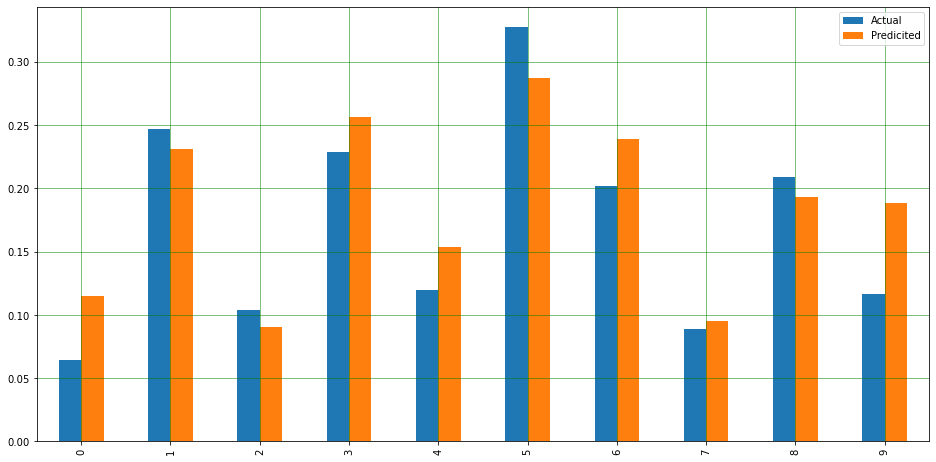

In [14]:
# Plot Actual vs Predicted
plot_df = pd.DataFrame({'Actual':y_test,'Predicited':predictTestSet})
plot_df.head(10).plot(kind='bar',figsize=(16,8))
plt.grid(which ='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which ='minor',linestyle=':',linewidth='0.5',color='black')

-----

### GUI Website

In [ ]:
# Install library Gradio
! pip install gradio --quiet

In [16]:
# Before we create the GUI web-based, we need to know what the data included
normal_data = pd.read_csv("ford.csv")

model_arr = np.array(pd.Categorical(normal_data['model']).categories)
transmission_arr = np.array(pd.Categorical(normal_data['transmission']).categories)
fuelType_arr = np.array(pd.Categorical(normal_data['fuelType']).categories)

print("Model:")
print(model_arr)

print("Transmission:")
print(transmission_arr)

print("fuelType:")
print(fuelType_arr)

print("year: " + str(min(normal_data["year"])) + "-" + str(max(normal_data["year"])))
print("mileage: " + str(min(normal_data["mileage"])) + "-" + str(max(normal_data["mileage"])))
print("tax: " + str(min(normal_data["tax"])) + "-" + str(max(normal_data["tax"])))
print("mpg: " + str(min(normal_data["mpg"])) + "-" + str(max(normal_data["mpg"])))
print("engineSize: " + str(min(normal_data["engineSize"])) + "-" + str(max(normal_data["engineSize"])))

Model:
[' B-MAX' ' C-MAX' ' EcoSport' ' Edge' ' Escort' ' Fiesta' ' Focus'
 ' Fusion' ' Galaxy' ' Grand C-MAX' ' Grand Tourneo Connect' ' KA' ' Ka+'
 ' Kuga' ' Mondeo' ' Mustang' ' Puma' ' Ranger' ' S-MAX' ' Streetka'
 ' Tourneo Connect' ' Tourneo Custom' ' Transit Tourneo' 'Focus']
Transmission:
['Automatic' 'Manual' 'Semi-Auto']
fuelType:
['Diesel' 'Electric' 'Hybrid' 'Other' 'Petrol']
year: 1996-2060
mileage: 1-177644
tax: 0-580
mpg: 20.8-201.8
engineSize: 0.0-5.0


In [17]:
import gradio as grd

def func(size, model, year, transmission, mileage, fuelType, tax, mpg, engineSize):
    if((size > 0.0 and size < 1) and (model!='Choose') and (year >= 1996 and year <= 2060) and (mileage >= 1 and mileage <= 180000) and (tax >= 0 and tax <= 580) and (mpg >= 20.0 and mpg <= 250.0) and (engineSize >= 0.0 and engineSize <= 5.0)):
        tempData = pd.read_csv("ford.csv")
        
        tData = {'model': model, 'year': year, 'transmission': transmission, 'mileage': mileage,
                 'fuelType': fuelType, 'tax': tax, 'mpg': mpg, 'engineSize': engineSize}
        
        tempData = tempData.append(tData, ignore_index=True)

        tempData['model'] = tempData['model'].astype('category')
        tempData['transmission'] = tempData['transmission'].astype('category')
        tempData['fuelType'] = tempData['fuelType'].astype('category')

        tempData['model'] = tempData['model'].cat.codes
        tempData['transmission'] = tempData['transmission'].cat.codes
        tempData['fuelType'] = tempData['fuelType'].cat.codes
        
        tempData_scaled = scaler.fit_transform(tempData.to_numpy())
        tempData_scaled = pd.DataFrame(tempData_scaled, columns=['model', 'year', 'price', 'transmission', 'mileage',
                                                                 'fuelType', 'tax','mpg', 'engineSize'])
        
        X = tempData_scaled[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']].values

        y = tempData_scaled['price'].values

        X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=size,shuffle=False,stratify=None)

        regressor.fit(X_train, y_train)

        predictTestSet = regressor.predict(X_test)

        comparePredict = pd.DataFrame({"Actual": y_test, "Prediction": predictTestSet})
        
        predictedPrice = comparePredict['Prediction'][len(comparePredict)-1]

        return ('Price: %s'% str(predictedPrice))

    else:
        return 'try again'


inf = grd.Interface(func, 
                   inputs=[grd.inputs.Slider(0.01, 0.99, 0.01, 0.2, label="Test Size (from 0 to 1 [Exclusive])"),
                           grd.inputs.Dropdown(["Choose","B-MAX", "C-MAX", "EcoSport", "Edge", "Escort", "Fiesta",
                                                "Focus", "Fusion", "Galaxy", "Grand C-MAX", "Grand Tourneo Connect",
                                                "KA", "Ka+", "Kuga", "Mondeo", "Mustang", "Puma", "Range", "S-MAX",
                                                "Streetka", "Tourneo Connect", "Tourneo Custom", "Transit Tourneo",
                                                "Focus"]), 
                          grd.inputs.Number(label="YEAR (from 1996 to 2060)"),
                          grd.inputs.Radio(["Automatic", "Manual", "Semi-Auto"]),
                          grd.inputs.Number(label="MILEAGE (from 1 to 180000)"),
                          grd.inputs.Radio(["Diesel", "Electric", "Hybrid", "Other", "Petrol"]),
                          grd.inputs.Number(label="TAX (from 0 to 580)"),
                          grd.inputs.Number(label="MPG (from 20.0 to 250.0)"),
                          grd.inputs.Number(label="ENGINESIZE (from 0.0 to 5.0)")],
                   outputs="text")

#inf.launch(share=True)
inf.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x1bfc9a2a310>,
 'http://127.0.0.1:7860/',
 None)